In this homework, you need to solve two tasks. For problems with theoretical calculations, you need to show a sufficient number of intermediate steps to explain how you have obtained the result. 
* Formulas are expected in Latex style inside the notebook. The assignment should be uploaded in Jupyter Notebook format(`.ipynb`). 
* Overall, there are 45 points, however, you can get a maximum of 40 points for this assignment( `your_points = max(your_points, 40)`). 
* No bonus points will be transferred to the next assignment.

# Task 1. Moscow weather (20 points)

In this task you need to estimate parameters and their confidence intervals for a given sample. As data, you will explore Moscow weather. You can look at some visualizations of martian weather [here](https://pudding.cool/2018/01/mars-weather/) (completely unrelated to Moscow weather, though).

First of all, you will need some libraries. Also, fix random seed to get reproducable results.

In [255]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib.pyplot as plt
from tqdm import tqdm

np.random.seed(366)

In [256]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [257]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-1'

/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-1


In [258]:
import matplotlib as mp
import matplotlib.font_manager

titlesize = 20
labelsize = 16
legendsize = labelsize
xticksize = 14
yticksize = xticksize

mp.rcParams['legend.markerscale'] = 1.5     # the relative size of legend markers vs. original
mp.rcParams['legend.handletextpad'] = 0.5
mp.rcParams['legend.labelspacing'] = 0.4    # the vertical space between the legend entries in fraction of fontsize
mp.rcParams['legend.borderpad'] = 0.5       # border whitespace in fontsize units
mp.rcParams['font.size'] = 12
mp.rcParams['font.family'] = 'serif'
mp.rcParams['font.serif'] = 'Times New Roman'
mp.rcParams['axes.labelsize'] = labelsize
mp.rcParams['axes.titlesize'] = titlesize
mp.rcParams['axes.unicode_minus'] = False

mp.rc('xtick', labelsize=xticksize)
mp.rc('ytick', labelsize=yticksize)
mp.rc('legend', fontsize=legendsize)

mp.rc('font', **{'family':'serif'})

# Construction of confidence intervals for $\tau = g(\theta)$ using MLE point estimations $\hat\theta$ for unknown parameter $\theta$ of distribution $f(x, \theta)$.

### 1. Find point estimation $\hat\theta$ for unknown parameter $\theta$

$$\hat\theta_n = \text{arg}\max_{\theta}\prod_{i = 1}^n f(x_i, \theta)$$

### 2. Define score function $S(x, \theta)$ for given distribution

$$S(x, \theta) = \frac{\partial}{\partial \theta}\log f(x, \theta)$$

### 2. Compute Fisher information $I(\theta)$ for score function $S(x, \theta)$

$$I_n(\theta) = \mathbb{D}_{\theta} \sum_{i = 1}^n S(x_i, \theta) = \sum_{i = 1}^n \mathbb{D}_{\theta} S(x_i, \theta) =
n\mathbb{D}_{\theta} S(x_n, \theta) = nI(\theta)$$

$$I(\theta) = \mathbb{D}_{\theta} \frac{\partial}{\partial \theta}\log f(x, \theta) = 
-\mathbb{E}_{\theta}\frac{\partial^2}{\partial \theta^2}\log f(x, \theta)$$

### 4. Plug estimation $\hat\theta_n$ into Fisher information $I_n(\theta)$ and construct scaling coefficient $\sigma(\hat\theta_n)$

$$\sigma(\hat\theta_n) = \sqrt{1 / I_n(\hat\theta_n)}$$

### 5. Plug estimation $\hat\theta_n$ and coefficient $\sigma(\hat\theta_n)$ into function $g(\theta)$ and construct estimation $\hat\tau_n$

$$\hat\tau_n = g(\hat\theta_n),\;\sigma(\hat\tau_n) = |g'(\hat\theta_n)|\sigma(\hat\theta_n)$$

### 6. Compute boundaries of asymptotic confidence interval

$$\mathbb{P}\bigg[\tau \in \bigg(\hat\tau_n - \frac{z_{\alpha/2}}{\sigma(\hat\tau_n)}, 
\hat\tau_n + \frac{z_{\alpha/2}}{\sigma(\hat\tau_n)}\bigg)\bigg] \to 1 - \alpha$$



## Part 1. Load data (1 point)

You need to load data from `moscow-weather.csv`, take feature for your variant, remove absent values (`Nan`s) and convert sample to `int` type. 

### a) 

`feature_name = "TMIN"`

### b)

`feature_name = "TMAX"`

In [259]:
feature_name = "TMIN"
df = pd.read_csv("moscow-weather.csv")[feature_name]
sample_full = df.dropna().values.astype(np.int)

Let's take a four month period or ~ 121 days. Sample them randomly from full sample using function `choice`(from `numpy.random`) with parameter `replace=False`.

In [260]:
n = 121
sample_part = np.random.choice(sample_full, n, replace=False)

Plot values frequences for full and partial sample using bar plot.

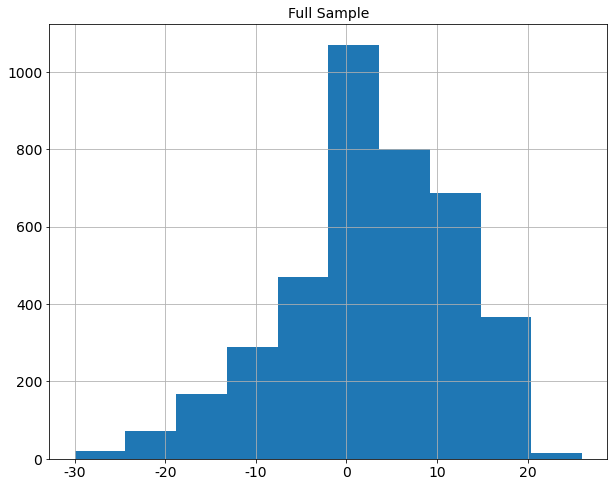

In [261]:
plt.figure(figsize=(10, 8))
plt.hist(sample_full)
plt.grid()
plt.title('Full Sample', fontsize=14)
plt.show()

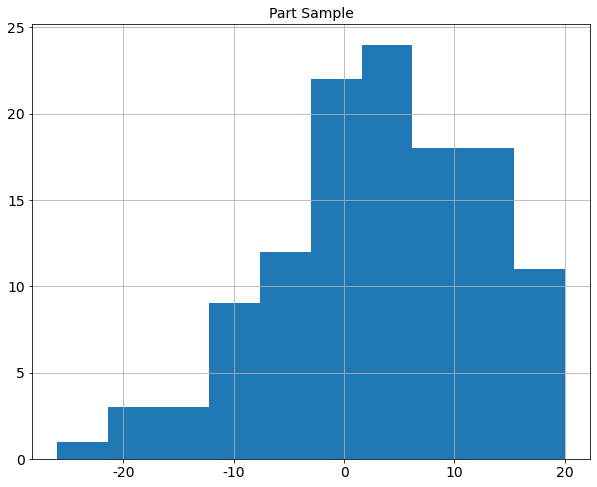

In [262]:
plt.figure(figsize=(10, 8))
plt.hist(sample_part)
plt.grid()
plt.title('Part Sample', fontsize=14)
plt.show()

## Part 2. Parameter estimation (6 points)
Find the following parameters' estimates and their 95% confidence intervals (except for `mode` and `skewness`). You need to show theoretical calculations (with intermediate steps) for estimates and intervals (with intermediate steps) and then make simulation.

In [263]:
alpha = 0.05

### a) Mean and CI

Let us denote the mean $\mathbb{E}x = \mu$ and the variance $\mathbb{D}x = \sigma^2$ of given distribution. Then we can use CLT and write the following statements

$$S_n = \sum\limits_{i = 1}^n x_i,\;\hat\mu_n = \frac{1}{n}\sum\limits_{i = 1}^n x_i = \frac{S_n}{n} \Longrightarrow 
\mathbb{E}\hat\mu_n = \frac{1}{n}\sum\limits_{i = 1}^n \mathbb{E}x_i = \mathbb{E}x_n = \mu,\;\mathbb{D}\hat\mu_n = 
\frac{1}{n^2}\sum\limits_{i = 1}^n \mathbb{D}x_i = \frac{\mathbb{D}x_n}{n}$$
$$\frac{S_n - \mathbb{E}S_n}{\sqrt{\mathbb{D}S_n}} = \frac{\hat\mu_n - \mathbb{E}x_n}{\sqrt{\mathbb{D}x_n / n}} = 
\frac{\hat\mu_n - \mu}{\sqrt{\sigma^2 / n}} \leadsto \text{N}_{0, 1}$$

Since the actual variance $\sigma^2$ is not known, we can compute the sample variance $\hat\sigma^2_n$ and use Slutsky's theorem considering its convergence to $\sigma^2$ in probability 

$$\hat\sigma^2_n = \frac{1}{n}\sum\limits_{i = 1}^n(x_i - \hat\mu_n)^2 \overset{\mathbb{P}}{\longrightarrow} \sigma^2,\; 
\frac{\hat\mu_n - \mu}{\sqrt{\hat\sigma^2_n / n}} \leadsto \text{N}_{0, 1} \Longrightarrow 
\mathbb{P}\Bigg(-z_{1 - \alpha/2} < \frac{\hat\mu_n - \mu}{\sqrt{\hat\sigma^2_n / n}} < z_{1 - \alpha/2}\Bigg) \longrightarrow 1 - \alpha$$

Finally, the asymptotic confidence interval can be expressed in the following way

$$\text{CI}(\mu) = \bigg(\hat\mu_n - z_{1 - \alpha/2}\sqrt{\hat\sigma^2_n / n}, \hat\mu_n + z_{1 - \alpha/2}\sqrt{\hat\sigma^2_n / n}\bigg)$$

In [264]:
def calculate_mean_parametric_interval(sample, alpha):
    quantile = stats.norm.ppf(1 - alpha / 2)

    mean_sample = np.mean(sample)
    variance_sample = np.var(sample, ddof=0)

    mean_half_interval = quantile * np.sqrt(variance_sample / len(sample))
    mean_left_boundary, mean_right_boundary = mean_sample - mean_half_interval, mean_sample + mean_half_interval

    return mean_sample, (mean_left_boundary, mean_right_boundary)

In [265]:
mean, (lower, upper) = calculate_mean_parametric_interval(sample_part, alpha)
print(f"Mean {mean:.3f} with confidence interval ({lower:.3f}, {upper:.3f})")

Mean 3.174 with confidence interval (1.534, 4.814)


In [266]:
mean_parametric_ci = (mean, (lower, upper))

### b) Median and CI

Here you can assume that PDF is continuous at the median point and provide a normal-based interval.

---

Let us denote the median $\gamma_{0.5} = m$ and assume that the sample comes from the normal distribution, then we can use the following estimation

$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right) \Longrightarrow f(m) = \frac{1}{\sqrt{2\pi\sigma^2}}$$

Laplace has established that in this case the distribution of sample median has such properties

$$\hat{m}_n = x_{[n / 2]},\;\mathbb{E}\hat{m}_n = m,\;\mathbb{D}\hat{m}_n = \frac{\pi\sigma^2}{2n} \Longrightarrow
\frac{\hat{m}_n - m}{\sqrt{\pi\sigma^2 / 2n}} \leadsto \text{N}_{0, 1}$$

here we can use Slutsky's theorem again for sample variance and get

$$\frac{\hat{m}_n - m}{\sqrt{\pi\hat\sigma^2_n / 2n}} \leadsto \text{N}_{0, 1} \Longrightarrow 
\mathbb{P}\Bigg(-z_{1 - \alpha/2} < \frac{\hat{m}_n - m}{\sqrt{\pi\hat\sigma^2_n / 2n}} < z_{1 - \alpha/2}\Bigg) \longrightarrow 1 - \alpha$$

Finally, the asymptotic confidence interval can be expressed in the following way

$$\text{CI}(m) = \bigg(\hat{m}_n - z_{1 - \alpha/2}\sqrt{\pi\hat\sigma^2_n / 2n}, \hat{m}_n + z_{1 - \alpha/2}\sqrt{\pi\hat\sigma^2_n / 2n}\bigg)$$

In [267]:
def calculate_median_parametric_interval(sample, alpha):
    quantile = stats.norm.ppf(1 - alpha / 2)

    median_sample = np.median(sample)
    variance_sample = np.var(sample, ddof=0)

    median_half_interval = quantile * np.sqrt(np.pi * variance_sample / (2 * len(sample)))
    median_left_boundary, median_right_boundary = median_sample - median_half_interval, median_sample + median_half_interval

    return median_sample, (median_left_boundary, median_right_boundary)

In [268]:
median, (lower, upper) = calculate_median_parametric_interval(sample_part, alpha)
print(f"Median {median:.3f} with normal-based confidence interval ({lower:.3f}, {upper:.3f})")

Median 4.000 with normal-based confidence interval (1.945, 6.055)


In [269]:
median_parametric_ci = (median, (lower, upper))

### c) Variance and CI

Here you can assume that the sample comes from a normal distribution, but the mean and variance are not known.

---

Let us denote the mean $\mathbb{E}x = \mu$ and the variance $\mathbb{D}x = \sigma^2$ of given distribution. 
We can use expressions from the a) task

$$\hat\sigma^2_n = \frac{1}{n}\sum\limits_{i = 1}^n (x_i - \hat\mu_n)^2 = 
\frac{1}{n}\sum\limits_{i = 1}^n \left(x_i - \frac{1}{n}\sum\limits_{j = 1}^n x_j\right)^2,\;\mathbb{E}\hat\sigma^2_n = 
\frac{n - 1}{n}\mathbb{D}x_n = \frac{n - 1}{n}\sigma^2$$

Here we can introduce standard normal variables $y_i = \cfrac{x_i - \mu}{\sigma}$
$$\hat\sigma^2_n = \frac{1}{n}\sum\limits_{i = 1}^n \left(x_i - \frac{1}{n}\sum\limits_{j = 1}^n x_j\right)^2 = 
\frac{\sigma^2}{n}\sum\limits_{i = 1}^n \left(\frac{x_i - \mu}{\sigma} - \frac{1}{n}\sum\limits_{j = 1}^n \frac{x_j - \mu}{\sigma}\right)^2 =$$
$$= \frac{\sigma^2}{n}\sum\limits_{i = 1}^n \left(y_i - \frac{1}{n}\sum\limits_{j = 1}^n y_j\right)^2 = 
\frac{\sigma^2}{n}\left[\sum\limits_{i = 1}^n y_i^2 - \left(\frac{1}{\sqrt{n}}\sum\limits_{j = 1}^n y_j\right)^2\right]$$

According to Fisher's theorem, the expression under the square brackets has distribution $\text{H}_{n - 1}$

$$\cfrac{n\hat\sigma^2_n}{\sigma^2} \sim \text{H}_{n - 1} \Longrightarrow 
\mathbb{P}\left(\chi^2_{\alpha/2, n - 1} < \cfrac{n\hat\sigma^2_n}{\sigma^2} < \chi^2_{1 - \alpha/2, n - 1}\right) = 1 - \alpha$$

Finally, the precise confidence interval can be expressed in the following way

$$ \text{CI}(\sigma^2) = \left(\frac{n\hat\sigma^2_n}{\chi^2_{1 - \alpha/2, n - 1}}, \frac{n\hat\sigma^2_n}{\chi^2_{\alpha/2, n - 1}}\right)$$

In [270]:
def calculate_variance_parametric_interval(sample, alpha, df):
    lower_quantile, upper_quantile = stats.chi2.ppf(alpha / 2, df=df), stats.chi2.ppf(1 - alpha / 2, df=df)

    variance_sample = np.var(sample_part, ddof=0)
    variance_left_boundary, variance_right_boundary = len(sample) * variance_sample / upper_quantile, len(sample) * variance_sample / lower_quantile

    return variance_sample, (variance_left_boundary, variance_right_boundary)

In [271]:
df = n - 1

In [272]:
var, (lower, upper) = calculate_variance_parametric_interval(sample_part, alpha, df)
print(f"Variance {var:.3f} with confidence interval ({lower:.3f}, {upper:.3f})")

Variance 84.722 with confidence interval (67.349, 111.948)


In [273]:
var_parametric_ci = (var, (lower, upper))

### d) Mode (most frequent value in a sample)

In [274]:
mode_part = stats.mode(sample_part)[0][0]
print(f"Mode: {mode_part}")

Mode: 10


### e) Skewness

In [275]:
skewness_part = stats.skew(sample_part)
print(f"Skewness: {skewness_part:.3f}")

Skewness: -0.499


## Part 3. Bootstrap (4 points)

Find confidence intervals for following estimates using bootsrap. Use function `choice` with parameter `replace=True` for bootstrap sampling. Try different numbers of generated samples.

### a) Mean and CI

In [276]:
def calculate_mean_bootstrap_interval(sample, n_resamples, n_bootstraps, alpha):
    means_over_bootstraps = []

    for i in range(n_bootstraps):
        bootstrap_distribution = np.random.choice(sample, n_resamples, replace=True)
        means_over_bootstraps.append(np.mean(bootstrap_distribution))
    
    quantile = stats.norm.ppf(1 - alpha / 2)

    mean_sample = np.mean(sample)
    mean_bootstrap_half_interval = quantile * np.sqrt(np.var(means_over_bootstraps))

    mean_bootstrap_left_boundary, mean_bootstrap_right_boundary = \
    mean_sample - mean_bootstrap_half_interval, mean_sample + mean_bootstrap_half_interval

    return mean_sample, (mean_bootstrap_left_boundary, mean_bootstrap_right_boundary)

In [277]:
n_resamples = n
n_bootstraps = 100
alpha = 0.05

In [278]:
mean, (lower, upper) = calculate_mean_bootstrap_interval(sample_part, n_resamples, n_bootstraps, alpha)
print(f"Mean {mean:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

Mean 3.174 with confident interval (1.609, 4.738)


In [279]:
mean_bootstrap_ci = (mean, (lower, upper))

### b) Median and CI

In [280]:
def calculate_median_bootstrap_interval(sample, n_resamples, n_bootstraps, alpha):
    medians_over_bootstraps = []

    for i in range(n_bootstraps):
        bootstrap_distribution = np.random.choice(sample, n_resamples, replace=True)
        medians_over_bootstraps.append(np.median(bootstrap_distribution))
    
    quantile = stats.norm.ppf(1 - alpha / 2)

    median_sample = np.median(sample)
    median_bootstrap_half_interval = quantile * np.sqrt(np.var(medians_over_bootstraps))

    median_bootstrap_left_boundary, median_bootstrap_right_boundary = \
    median_sample - median_bootstrap_half_interval, median_sample + median_bootstrap_half_interval

    return median_sample, (median_bootstrap_left_boundary, median_bootstrap_right_boundary)

In [281]:
n_resamples = n
n_bootstraps = 100
alpha = 0.05

In [282]:
median, (lower, upper) = calculate_median_bootstrap_interval(sample_part, n_resamples, n_bootstraps, alpha)
print(f"Median {median:.3f} with normal-based confident interval ({lower:.3f}, {upper:.3f})")

Median 4.000 with normal-based confident interval (1.690, 6.310)


In [283]:
median_bootstrap_ci = (median, (lower, upper))

### c) Variance and CI

In [284]:
def calculate_variance_bootstrap_interval(sample, n_resamples, n_bootstraps, alpha):
    variances_over_bootstraps = []

    for i in range(n_bootstraps):
        bootstrap_distribution = np.random.choice(sample, n_resamples, replace=True)
        variances_over_bootstraps.append(np.var(bootstrap_distribution))
    
    quantile = stats.norm.ppf(1 - alpha / 2)

    variance_sample = np.var(sample_part)
    variance_bootstrap_half_interval = quantile * np.sqrt(np.var(variances_over_bootstraps))

    variance_bootstrap_left_boundary, variance_bootstrap_right_boundary = \
    variance_sample - variance_bootstrap_half_interval, variance_sample + variance_bootstrap_half_interval

    return variance_sample, (variance_bootstrap_left_boundary, variance_bootstrap_right_boundary)

In [285]:
n_resamples = n
n_bootstraps = 100
alpha = 0.05

In [286]:
var, (lower, upper) = calculate_variance_bootstrap_interval(sample_part, n_resamples, n_bootstraps, alpha)
print(f"Variance {var:.3f} with confident interval ({lower:.3f}, {upper:.3f})")

Variance 84.722 with confident interval (66.231, 103.213)


In [287]:
var_bootstrap_ci = (var, (lower, upper))

## Part 4. Comparison with true values (1 point)

Compare with estimates calculated over full sample. Write conclusion about estimates and their confidence intervals obtained without and with bootstrap. Also, you can share some conclusions about moscow weather :)

In [288]:
mean_full = np.mean(sample_full)
median_full = np.median(sample_full)
var_full = np.var(sample_full)
mode_full = stats.mode(sample_full)[0][0]
skewness_full = stats.skew(sample_full)

In [289]:
print(f"Mean {mean_full:.3f}, median {median_full:.3f}, variance {var_full:.3f}, mode {mode_full:.3f}, skewness {skewness_full:.3f}")

Mean 2.616, median 3.000, variance 89.005, mode 0.000, skewness -0.475


We can see that both parametric and bootstrap confidence intervals cover the true mean, but bootstrap interval is tighter

In [290]:
mean_parametric_ci[1]

(1.5335177796201356, 4.813589658396394)

In [291]:
mean_bootstrap_ci[1]

(1.608675770398999, 4.73843166761753)

The same is true for variance confidence intervals

In [292]:
var_parametric_ci[1]

(67.34945732292948, 111.94779531526436)

In [293]:
var_bootstrap_ci[1]

(66.230585819409, 103.21330462523277)

But not for median confidence intervals

In [294]:
median_parametric_ci[1]

(1.9445197714593507, 6.055480228540649)

In [295]:
median_bootstrap_ci[1]

(1.6899847516030961, 6.310015248396904)

## Part 5. Confidence intervals and sample size (8 points)

Compare the size of confidence intervals **for the mean** obtained without and with bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the mean of the full sample). Consider sizes `[42, 84, 168, 335, 670, 1340]`. Plot results and make conclusion about their accuracy.

In [296]:
from tqdm import tqdm

In [297]:
# np.random.seed(476)
np.random.seed(5)
sizes = np.r_[42, 84, 168, 335, 670, 1340]

In [298]:
n_bootstraps = 100
alpha = 0.05

In [299]:
n_sample_parts = 200
n_parametric_ci_covers, n_bootstrap_ci_covers = [], []
track_parametric_ci_per_size, track_bootstrap_ci_per_size = [], []

for size in tqdm(sizes):
    n_resamples = size
    n_parametric_ci_cover = n_bootstrap_ci_cover = 0
    track_parametric_ci = track_bootstrap_ci = 0
    
    for _ in range(n_sample_parts):
        sample_part = np.random.choice(sample_full, size, replace=False)

        # parametric interval
        mean_parametric_ci = calculate_mean_parametric_interval(sample_part, alpha)
        mean_parametric_ci_left_boundary, mean_parametric_ci_right_boundary = mean_parametric_ci[1]

        track_parametric_ci += mean_parametric_ci_right_boundary - mean_parametric_ci_left_boundary
        n_parametric_ci_cover += int(mean_parametric_ci_left_boundary < mean_full < mean_parametric_ci_right_boundary)

        # bootstrap interval
        mean_bootstrap_ci = calculate_mean_bootstrap_interval(sample_part, n_resamples, n_bootstraps, alpha)
        mean_bootstrap_ci_left_boundary, mean_bootstrap_ci_right_boundary = mean_bootstrap_ci[1]

        track_bootstrap_ci += mean_bootstrap_ci_right_boundary - mean_bootstrap_ci_left_boundary
        n_bootstrap_ci_cover += int(mean_bootstrap_ci_left_boundary < mean_full < mean_bootstrap_ci_right_boundary)
    
    track_parametric_ci_per_size.append(track_parametric_ci / n_sample_parts)
    track_bootstrap_ci_per_size.append(track_bootstrap_ci / n_sample_parts)
    
    n_parametric_ci_covers.append(n_parametric_ci_cover / n_sample_parts)
    n_bootstrap_ci_covers.append(n_bootstrap_ci_cover / n_sample_parts)

100%|██████████| 6/6 [00:08<00:00,  1.46s/it]


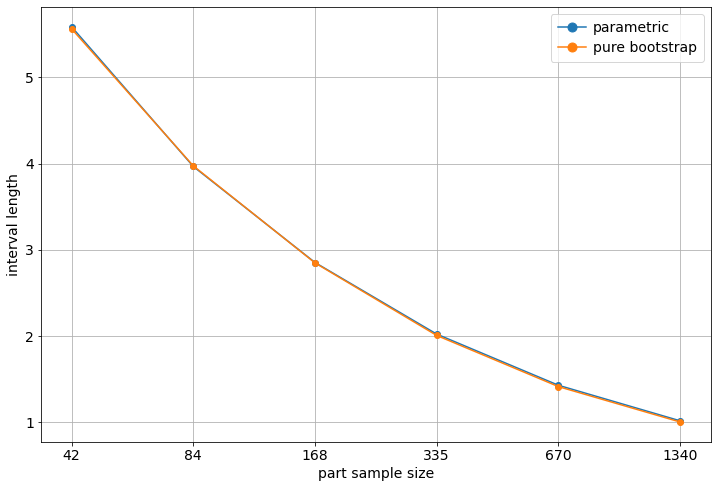

In [300]:
plt.figure(figsize=(12, 8))
plt.plot(track_parametric_ci_per_size, marker='o')
plt.plot(track_bootstrap_ci_per_size, marker='o')

plt.xlabel('part sample size', fontsize=14)
plt.ylabel('interval length', fontsize=14)

plt.xticks(list(range(len(sizes))), sizes)
plt.legend(['parametric', 'pure bootstrap'], fontsize=14)
plt.grid()
plt.show()

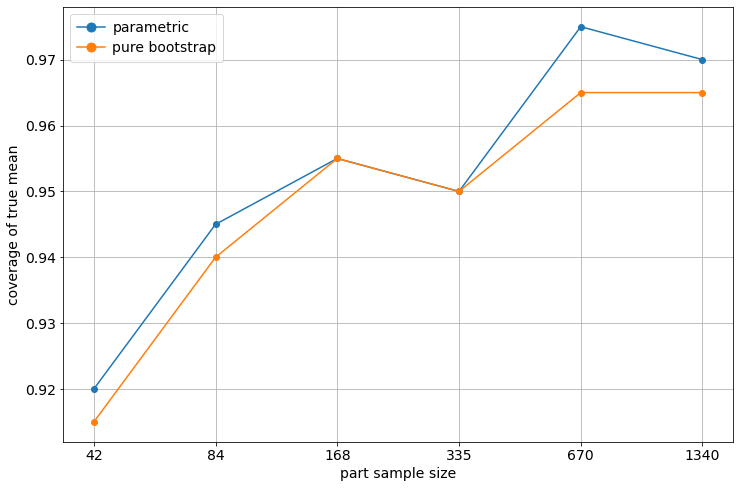

In [301]:
plt.figure(figsize=(12, 8))
plt.plot(n_parametric_ci_covers, marker='o')
plt.plot(n_bootstrap_ci_covers, marker='o')

plt.xlabel('part sample size', fontsize=14)
plt.ylabel('coverage of true mean', fontsize=14)

plt.xticks(list(range(len(sizes))), sizes)
plt.legend(['parametric', 'pure bootstrap'], fontsize=14)
plt.grid()
plt.show()

We can see that bootstrap confidence intervals has almost the same length as parametric ones, while parametric intervals generally provide better coverage. Length of the interval is decreasing with number of samples, while coverage is increasing, yet not gradually.

# Task 2. Currency in RC-circuit (25 points)

In this part you need to estimate parameters and apply delta method. 

First of all, you will need some libraries. Also, fix random seed to get reproducible results.

In [218]:
import numpy as np
from scipy import stats

np.random.seed(100)

In [219]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [220]:
%cd '/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-1'

/content/gdrive/MyDrive/Colab Notebooks/Principles of Applied Statistics/homework-1


## Part 1. Estimate parameters (4 points)

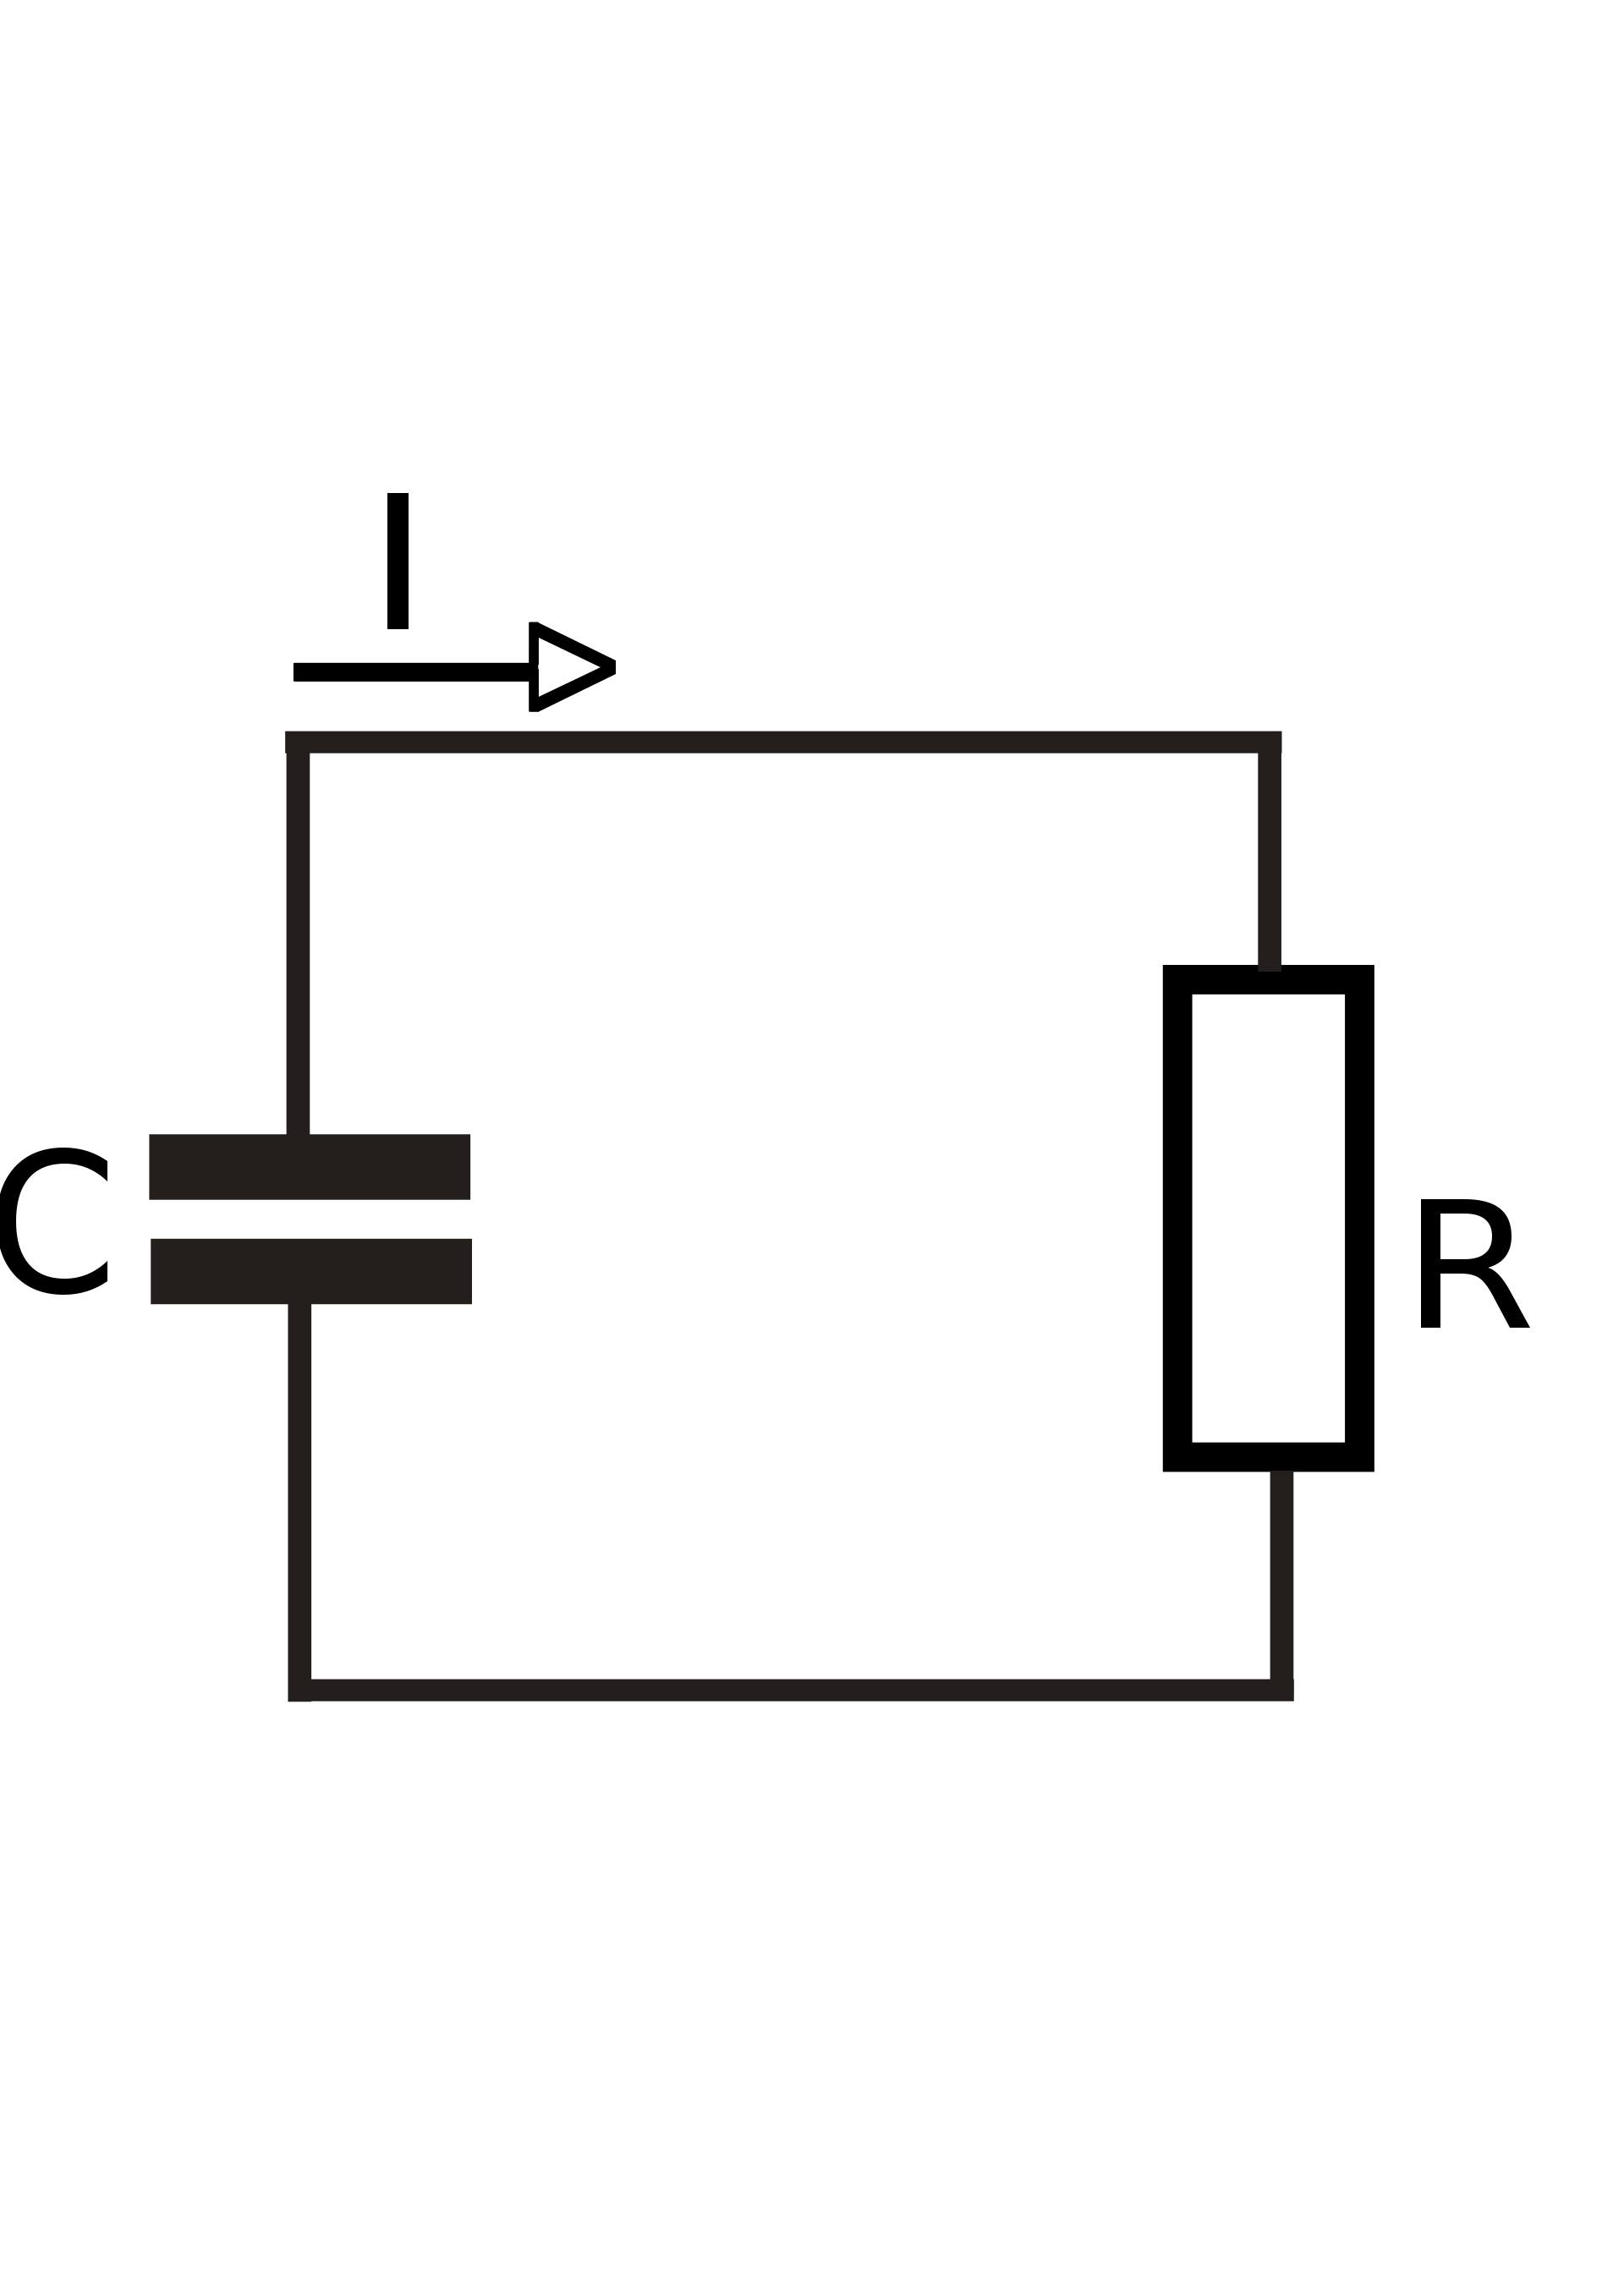

In [221]:
from IPython.display import Image
Image(filename='circuit.png', width=200)

Assume that there is an RC-circuit with a capacitor and a resistor.

We charge the capacitor until it reaches voltage $V$ and measure current intensity. In this case voltage on the capacitor yields the formula for exponential decay:

$$ V_C(t) = V e^{-\frac{t}{RC}} $$

Let's assume that voltage $V$ and resistence $R$ are independent and belong to the following distributions:

### a) 
$V \sim \mathcal{N}(4, 1)$, 

$R \sim \mathcal{U}(6, 11)$

### b) 
$V \sim \mathcal{N}(17, 3)$, 

$R \sim \text{Exp}(22)$

Consider **true values** for $V$ and $R$ to be the means of the corresponding distributions.

Generate sample for $V$ of size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for the estimates (with intermediate steps) and make simulation.

---

## MLE mean estimation for normal distribution
Let us denote the mean $\mathbb{E}V = \mu$ and the variance $\mathbb{D}V = \sigma^2$ of given distribution. Then we can write

$$f(x, \mu) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x - \mu)^2}{2\sigma^2}\right)$$
$$\hat\mu_n = \text{arg}\max_{\mu}\mathcal{L}(x, \mu) = \text{arg}\max_{\mu}\sum\limits_{i = 1}^n \log f(x_i, \mu) = 
\text{arg}\min_{\mu}\sum\limits_{i = 1}^n \frac{(x_i - \mu)^2}{2\sigma^2} = 
\text{arg}\min_{\mu}\sum\limits_{i = 1}^n (x_i - \mu)^2$$
$$\frac{\partial \mathcal{L}}{\partial \mu} = 2\sum\limits_{i = 1}^n (\mu - x_i) = 
2\left[n\mu - \sum\limits_{i = 1}^n x_i\right] = 0 \Longrightarrow n\mu = \sum\limits_{i = 1}^n x_i,\;
\hat\mu = \frac{1}{n}\sum\limits_{i = 1}^n x_i$$

Generate sample for $R$ on size 100. Apply maximum likelihood to estimate the mean. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

---

## MLE mean estimation for uniform distribution

Let us denote the left and right ends of interval as $a$ and $b$ correspondingly, while the mean $\mathbb{E}R = \mu$ and 
the variance $\mathbb{D}R = \sigma^2$. We can first estimate the parameters of uniform distribution

$$f(x, a, b) = \frac{\mathbb{I}_{[a, b]}(x)}{b - a}$$
$$\hat{a}_n, \hat{b}_n = \text{arg}\max_{a, b}\mathcal{L}(x, a, b) = \text{arg}\max_{a, b}\prod\limits_{i = 1}^n f(x_i, a, b) = 
\text{arg}\max_{a, b}\prod\limits_{i = 1}^n \frac{\mathbb{I}_{[a, b]}(x_i)}{b - a} =$$
$$= \text{arg}\max_{a, b}\frac{1}{(b - a)^n}\prod\limits_{i = 1}^n\mathbb{I}_{[-\infty, b]}(x_i)
\prod\limits_{j = 1}^n\mathbb{I}_{[a, \infty]}(x_j) = \text{arg}\max_{a, b}\frac{1}{(b - a)^n}
\mathbb{I}_{(-\infty, b]}(x_{(n)})\mathbb{I}_{[a, +\infty)}(x_{(1)})$$

Since the objective is monotonically decreasing with $b$ until $x_{(n)}$, we get $\hat{b} = x_{(n)}$. Moreover, since the objective is monotonically increasing with $a$ until $x_{(1)}$, we get $\hat{a} = x_{(1)}$.

Finally, let us express the desired mean $\mu$ through the parameters $a$ and $b$ as $\mu = g(a, b) = \cfrac{a + b}{2}$ and then use 
the equivariance of MLE

$$\hat\mu = g(\hat{a}, \hat{b}) = \frac{\hat{a} + \hat{b}}{2} = \frac{x_{(1)} + x_{(n)}}{2}$$


In [222]:
# a)
n = 100

v_mean, v_variance = 4, 1
r_left, r_right = 6, 11
r_mean = (r_left + r_right) / 2

v_sample = np.random.randn(n) * v_variance + v_mean
r_sample = np.random.rand(n) * (r_right - r_left) + r_left

v_mean_estimated = np.mean(v_sample)
r_mean_estimated = np.mean(r_sample)

In [223]:
print(f'True mean {v_mean:.3f} of V vs estimated mean {v_mean_estimated:.3f} of V')

True mean 4.000 of V vs estimated mean 3.896 of V


In [224]:
print(f'True mean {r_mean:.3f} of R vs estimated mean {r_mean_estimated:.3f} of R')

True mean 8.500 of R vs estimated mean 8.611 of R


## MLE mean estimation for exponential distribution

Let us denote the mean $\mathbb{E}R = \mu$. We can first estimate the parameter $\lambda$ of exponential distribution

$$f(x, \lambda) = \lambda \exp(-\lambda x)\mathbb{I}_{[0, +\infty)}(x)$$
$$\hat\lambda_n = \text{arg}\max_{\lambda}\mathcal{L}(x, \lambda) = \text{arg}\max_{\lambda}\prod\limits_{i = 1}^n f(x_i, \lambda) = 
\text{arg}\max_{\lambda}\prod\limits_{i = 1}^n \lambda \exp(-\lambda x_i)\mathbb{I}_{[0, +\infty)}(x_i) =$$
$$= \text{arg}\max_{\lambda}\prod\limits_{i = 1}^n \lambda \exp(-\lambda x_i)\prod\limits_{i = 1}^n \mathbb{I}_{[0, +\infty)}(x_i) = 
\text{arg}\max_{\lambda}\lambda^n \exp\left(-\lambda \sum\limits_{i = 1}^n x_i\right)\mathbb{I}_{[0, +\infty)}(x_{(1)}) =$$
$$= \text{arg}\max_{\lambda}\left(n\log\lambda -\lambda \sum\limits_{i = 1}^n x_i\right)\mathbb{I}_{[0, +\infty)}(x_{(1)})$$
$$\frac{\partial\mathcal{L}}{\partial\lambda}\bigg|_{x_{(1)} \in [0, +\infty)} = \frac{n}{\lambda} - \sum\limits_{i = 1}^n x_i = 0 
\Longrightarrow \frac{1}{\hat\lambda} = \frac{1}{n}\sum\limits_{i = 1}^n x_i,\;\hat\lambda = n\left(\sum\limits_{i = 1}^n x_i\right)^{-1}$$

Finally, let us express the desired mean $\mu$ through the parameters $\lambda$ as $\mu = g(\lambda) = \cfrac{1}{\lambda}$ and then use 
the equivariance of MLE

$$\hat\mu = g(\hat\lambda) = \frac{1}{\hat\lambda} = \frac{1}{n}\sum\limits_{i = 1}^n x_i$$

## Part 2. Apply delta method (8 points)

Assume, that we measure current intensity after 1 second. Let's take $C = 1$. In this case we get the following simplified formula

$$I = \frac{V}{R} \exp(-1/R)$$

Find estimate for current and it's confidence interval. Show theoretical calculations for estimates (with intermediate steps) and make simulation.

---

As I understand, we have to provide the estimation for parameter $I$ which represents a specific function of the true values of 
variables $V$ and $R$ aka the means of their corresponding distributions. So we can use the equivariance of MLE and write the following 
statement (here $I = \tau$)

$$\tau = g(\mu_V, \mu_R) = \frac{\mu_V}{\mu_R} \exp(-1/\mu_R) \Longrightarrow \hat{\tau}_n = 
g(\hat\mu_V, \hat\mu_R) = \frac{\hat\mu_V}{\hat\mu_R} \exp(-1/\hat\mu_R)$$

In order to construct the confidence interval for this estimation we can use delta method

$$\hat\nabla g = \nabla g(\hat\mu_V, \hat\mu_R) = \left(\frac{\partial g}{\partial\mu_V}, \frac{\partial g}{\partial\mu_R}\right)
\Bigg|_{\hat\mu_V,\,\hat\mu_R} = \left(\frac{\exp(-1/\hat\mu_R)}{\hat\mu_R}, 
\frac{\hat\mu_V\exp(-1/\hat\mu_R)(1 / \hat\mu_R - 1)}{\hat\mu_R^2}\right)$$

Now we need to find the variance of the mean estimation $\hat\mu_R$ for uniform distribution. For convenience of the futher derivation, let us 
first introduce standard uniform variables $y_i = \cfrac{x_i - a}{b - a}$, then every order statistic $x_{(i)}$ is standardized in the same 
way.

Let us find the variance of the first order statistic $y_{(1)}$

$$F_{(1)}(x) = \mathbb{P}(y_{(1)} < x) = 1 - \mathbb{P}(y_{(1)} > x) = 1 - \mathbb{P}(y_{n} > x)^n = 
1 - \Big[1 - \mathbb{P}(y_{n} < x)\Big]^n = 1 - (1 - x)^n$$
$$\frac{dF_{(1)}}{dx} = n(1 - x)^{n - 1},\;\mathbb{E}y_{(1)} = \int\limits_0^1 nx(1 - x)^{n - 1}dx = \int\limits_0^1 n(1 - x)x^{n - 1}dx =$$
$$= \int\limits_0^1 nx^{n - 1}dx - \int\limits_0^1 nx^n dx = 1 - \frac{n}{n + 1} = \frac{1}{n + 1}$$
$$\mathbb{E}y_{(1)}^2 = \int\limits_0^1 nx^2(1 - x)^{n - 1}dx = \int\limits_0^1 n(1 - x)^2 x^{n - 1}dx =$$
$$= \int\limits_0^1 nx^{n - 1}dx - 2\int\limits_0^1 nx^n dx + \int\limits_0^1 nx^{n + 1}dx = 1 - \frac{2n}{n + 1} + \frac{n}{n + 2}$$
$$\mathbb{D}y_{(1)} = \mathbb{E}y_{(1)}^2 - \Big[\mathbb{E}y_{(1)}\Big]^2 = 
1 - \frac{2n}{n + 1} + \frac{n}{n + 2} - \frac{1}{(n + 1)^2} = ... = \frac{n}{(n + 1)^2(n + 2)}$$

Futher, the variance of the n'th order statistic $y_{(n)}$

$$F_{(n)}(x) = \mathbb{P}(y_{(n)} < x) = \mathbb{P}(y_{n} < x)^n = x^n$$
$$\frac{dF_{(n)}}{dx} = nx^{n - 1},\;\mathbb{E}y_{(n)} = \int\limits_0^1 nx^{n}dx = \frac{n}{n + 1},\;
\mathbb{E}y_{(n)}^2 = \int\limits_0^1 nx^{n + 1}dx = \frac{n}{n + 2}$$
$$\mathbb{D}y_{(n)} = \mathbb{E}y_{(n)}^2 - \Big[\mathbb{E}y_{(n)}\Big]^2 = 
\frac{n}{n + 2} - \frac{n^2}{(n + 1)^2} = ... = \frac{n}{(n + 1)^2(n + 2)}$$

And the covariance according to https://math.stackexchange.com/questions/400677/covariance-of-order-statistics-uniform-case
$$\text{cov}\Big[y_{(1)}, y_{(n)}\Big] = \frac{n^2}{(n + 1)^2(n + 2)}$$

Spending a couple of years on the derivation of these formulas and finding the expression for the covariance of order statistics of uniform distribution, we can write the variance of estimation $\mu_R$

$$\mathbb{D}\hat\mu_R = \frac{1}{4}\mathbb{D}\Big[x_{(1)} + x_{(n)}\Big] = \frac{(b - a)^2}{4}\mathbb{D}\Big[y_{(1)} + y_{(n)}\Big] =$$
$$= \frac{(b - a)^2}{4}\Big[\mathbb{D}y_{(1)} + \mathbb{D}y_{(n)} + 2\text{cov}\Big[y_{(1)}, y_{(n)}\Big]\Big] = 
\frac{n(b - a)^2}{2(n + 1)(n + 2)}$$

Moreover, the variance of estimation $\mu_V$ is the following

$$\mathbb{D}\hat\mu_V = \frac{\mathbb{D}V}{n} = \frac{\sigma^2}{n}$$

Since we should pretend that we do not know the parameters of normal and uniform distribution, we just need to exploit 
the MLE and plug the found estimations into the obtained expressions

$$\hat{a}_n = x_{(1)},\;\hat{b}_n = x_{(n)} \Longrightarrow 
\mathbb{D}\hat\mu_R \approx \frac{n(\hat{b}_n - \hat{a}_n)^2}{2(n + 1)(n + 2)}$$
$$\hat\sigma^2 = \frac{1}{n}\sum\limits_{i = 1}^n(x_i - \hat\mu_n)^2 \Longrightarrow 
\mathbb{D}\hat\mu_V \approx \frac{\hat\sigma^2_n}{n}$$

Now also have to plug the found characteristics into the matrix $J$ and obtain $\hat{J}$

$$\hat{J} = J(\hat\mu_V, \hat\mu_R) = \begin{bmatrix}
\mathbb{D}\hat\mu_V & 0 \\
0 & \mathbb{D}\hat\mu_R
\end{bmatrix} \Longrightarrow \sigma(\hat\tau) = \sqrt{(\hat\nabla g)^T\hat{J}\hat\nabla g}$$

After these preparations we can write

$$\mathbb{P}\Bigg(-z_{1 - \alpha/2} < \frac{\hat\tau_n - \tau}{\sigma(\hat\tau_n)} < z_{1 - \alpha/2}\Bigg) \longrightarrow 1 - \alpha$$

And the necessary asymptotic confidence interval can be expressed as follows
$$ \text{CI}(\tau) = \Big(\hat\tau_n - z_{1 - \alpha/2}\sigma(\hat\tau_n), \hat\tau_n + z_{1 - \alpha/2}\sigma(\hat\tau_n)\Big)$$

In [225]:
def calculate_functional_parametric_interval(sample_normal, sample_uniform, alpha):
    quantile = stats.norm.ppf(1 - alpha / 2)

    estimation_normal = np.mean(sample_normal)
    estimation_uniform = (min(sample_uniform) + max(sample_uniform)) / 2

    variance_normal = np.var(sample_normal, ddof=0) / len(sample_normal)
    variance_uniform = len(sample_uniform) * (max(sample_uniform) - min(sample_uniform)) ** 2 / \
                              (2 * (len(sample_uniform) + 1) * (len(sample_uniform) + 2))

    gradient_normal = np.exp(-1 / estimation_uniform) / estimation_uniform
    gradient_uniform = estimation_normal * np.exp(-1 / estimation_uniform) * (1 / estimation_uniform - 1) / estimation_uniform ** 2
    
    J = np.diag([variance_normal, variance_uniform])
    gradient = np.array([gradient_normal, gradient_uniform])

    scaling_coefficient = np.sqrt(np.inner(gradient, J @ gradient.T))
    half_interval = quantile * scaling_coefficient

    estimation_functional = estimation_normal / estimation_uniform * np.exp(-1 / estimation_uniform)
    left_boundary, right_boundary = estimation_functional - half_interval, estimation_functional + half_interval

    return estimation_functional, (left_boundary, right_boundary)

In [226]:
functional, (lower, upper) = calculate_functional_parametric_interval(v_sample, r_sample, alpha)
print(f"Functional estimation {functional:.5f} with confidence interval ({lower:.5f}, {upper:.5f})")

Functional estimation 0.40479 with confidence interval (0.37075, 0.43882)


In [227]:
functional_parametric_ci = (functional, (lower, upper))

## Part 3. Non-parametric bootstrap estimation (2 points)

Estimate confidence interval for $I$ using non-parametric bootstrap.

In [228]:
def calculate_functional_bootstrap_interval(sample_normal, sample_uniform, n_resamples, n_bootstraps, alpha):
    estimations_over_functional_bootstraps = []

    for i in range(n_bootstraps):
        bootstrap_normal_distribution = np.random.choice(sample_normal, n_resamples, replace=True)
        bootstrap_uniform_distribution = np.random.choice(sample_uniform, n_resamples, replace=True)

        estimation_normal = np.mean(bootstrap_normal_distribution)
        estimation_uniform = (min(bootstrap_uniform_distribution) + max(bootstrap_uniform_distribution)) / 2

        estimation_functional = estimation_normal / estimation_uniform * np.exp(-1 / estimation_uniform)
        estimations_over_functional_bootstraps.append(estimation_functional)
    
    quantile = stats.norm.ppf(1 - alpha / 2)

    estimation_normal = np.mean(sample_normal)
    estimation_uniform = (min(sample_uniform) + max(sample_uniform)) / 2

    estimation_functional = estimation_normal / estimation_uniform * np.exp(-1 / estimation_uniform)
    half_interval = quantile * np.sqrt(np.var(estimations_over_functional_bootstraps))
    left_boundary, right_boundary = estimation_functional - half_interval, estimation_functional + half_interval

    return estimation_functional, (left_boundary, right_boundary)

In [229]:
n_resamples = len(v_sample)
n_bootstraps = 100
alpha = 0.05

In [230]:
functional, (lower, upper) = calculate_functional_bootstrap_interval(v_sample, r_sample, n_resamples, n_bootstraps, alpha)
print(f"Functional estimation {functional:.5f} with confidence interval ({lower:.5f}, {upper:.5f})")

Functional estimation 0.40479 with confidence interval (0.38395, 0.42563)


In [231]:
functional_bootstrap_ci = (functional, (lower, upper))

## Part 4. Parametric bootstrap estimation (3 points)

Estimate confidence interval for $I$ using parametric bootstrap.

In [232]:
def calculate_functional_parametric_bootstrap_interval(sample_normal, sample_uniform, n_resamples, n_bootstraps, alpha):
    estimations_over_functional_bootstraps = []
    
    estimation_normal_mean, estimation_normal_variance = np.mean(sample_normal), np.var(sample_normal, ddof=0)
    estimation_uniform_left, estimation_uniform_right = min(sample_uniform), max(sample_uniform)

    for i in range(n_bootstraps):
        bootstrap_normal_distribution = np.random.randn(n_resamples) * estimation_normal_variance + estimation_normal_mean
        bootstrap_uniform_distribution = np.random.rand(n_resamples) * (estimation_uniform_right - estimation_uniform_left) + estimation_uniform_left

        estimation_normal = np.mean(bootstrap_normal_distribution)
        estimation_uniform = (min(bootstrap_uniform_distribution) + max(bootstrap_uniform_distribution)) / 2

        estimation_functional = estimation_normal / estimation_uniform * np.exp(-1 / estimation_uniform)
        estimations_over_functional_bootstraps.append(estimation_functional)
    
    quantile = stats.norm.ppf(1 - alpha / 2)

    estimation_normal = np.mean(sample_normal)
    estimation_uniform = (min(sample_uniform) + max(sample_uniform)) / 2

    estimation_functional = estimation_normal / estimation_uniform * np.exp(-1 / estimation_uniform)
    half_interval = quantile * np.sqrt(np.var(estimations_over_functional_bootstraps))
    left_boundary, right_boundary = estimation_functional - half_interval, estimation_functional + half_interval

    return estimation_functional, (left_boundary, right_boundary)

In [233]:
n_resamples = len(v_sample)
n_bootstraps = 100
alpha = 0.05

In [234]:
functional, (lower, upper) = calculate_functional_parametric_bootstrap_interval(v_sample, r_sample, n_resamples, n_bootstraps, alpha)
print(f"Functional estimation {functional:.5f} with confidence interval ({lower:.5f}, {upper:.5f})")

Functional estimation 0.40479 with confidence interval (0.38581, 0.42376)


In [235]:
functional_parametric_bootstrap_ci = (functional, (lower, upper))

## Part 5. Compare results (8 points)

Compare the size of confidence intervals obtained using delta method, parametric and non-parametric bootstrap. Additionally, compare the empirical coverage of different confidence intervals (by generating sufficient number of samples of corresponding size and calculating proportion of cases when the interval covers the true value for the current $I$). Consider sizes `[1e1, ..., 1e4]`. Plot results and make conclusion about their accuracy.

In [236]:
n = 200

v_mean, v_variance = 4, 1
r_left, r_right = 6, 11
r_mean = (r_left + r_right) / 2

v_sample = np.random.randn(n) * v_variance + v_mean
r_sample = np.random.rand(n) * (r_right - r_left) + r_left

In [245]:
np.random.seed(17)

In [246]:
sizes = np.logspace(1, 4, 4).astype(np.int)

In [247]:
sizes

array([   10,   100,  1000, 10000])

In [248]:
functional = 2 * v_mean / (r_left + r_right) * np.exp(-2 / (r_left + r_right))

In [249]:
functional

0.4183575366601297

In [250]:
n_sample_parts = 100
n_parametric_ci_covers, n_bootstrap_ci_covers, n_parametric_bootstrap_ci_covers = [], [], []
track_parametric_ci_per_size, track_bootstrap_ci_per_size, track_parametric_bootstrap_ci_per_size = [], [], []

for size in tqdm(sizes):
    n_resamples = size
    n_parametric_ci_cover = n_bootstrap_ci_cover = n_parametric_bootstrap_ci_cover = 0
    track_parametric_ci = track_bootstrap_ci = track_parametric_bootstrap_ci = 0
    
    for _ in range(n_sample_parts):
        v_sample = np.random.randn(size) * v_variance + v_mean
        r_sample = np.random.rand(size) * (r_right - r_left) + r_left

        # delta method parametric interval
        parametric_ci = calculate_functional_parametric_interval(v_sample, r_sample, alpha)
        parametric_ci_left_boundary, parametric_ci_right_boundary = parametric_ci[1]

        track_parametric_ci += parametric_ci_right_boundary - parametric_ci_left_boundary
        n_parametric_ci_cover += int(parametric_ci_left_boundary < functional < parametric_ci_right_boundary)

        # pure bootstrap interval
        bootstrap_ci = calculate_functional_bootstrap_interval(v_sample, r_sample, n_resamples, n_bootstraps, alpha)
        bootstrap_ci_left_boundary, bootstrap_ci_right_boundary = bootstrap_ci[1]

        track_bootstrap_ci += bootstrap_ci_right_boundary - bootstrap_ci_left_boundary
        n_bootstrap_ci_cover += int(bootstrap_ci_left_boundary < functional < bootstrap_ci_right_boundary)

        # parametric bootstrap interval
        parametric_bootstrap_ci = calculate_functional_parametric_bootstrap_interval(v_sample, r_sample, n_resamples, n_bootstraps, alpha)
        parametric_bootstrap_ci_left_boundary, parametric_bootstrap_ci_right_boundary = parametric_bootstrap_ci[1]

        track_parametric_bootstrap_ci += parametric_bootstrap_ci_right_boundary - parametric_bootstrap_ci_left_boundary
        n_parametric_bootstrap_ci_cover += int(parametric_bootstrap_ci_left_boundary < functional < parametric_bootstrap_ci_right_boundary)
    
    track_parametric_ci_per_size.append(track_parametric_ci / n_sample_parts)
    track_bootstrap_ci_per_size.append(track_bootstrap_ci / n_sample_parts)
    track_parametric_bootstrap_ci_per_size.append(track_parametric_bootstrap_ci / n_sample_parts)
    
    n_parametric_ci_covers.append(n_parametric_ci_cover / n_sample_parts)
    n_bootstrap_ci_covers.append(n_bootstrap_ci_cover / n_sample_parts)
    n_parametric_bootstrap_ci_covers.append(n_parametric_bootstrap_ci_cover / n_sample_parts)

100%|██████████| 4/4 [01:04<00:00, 16.03s/it]


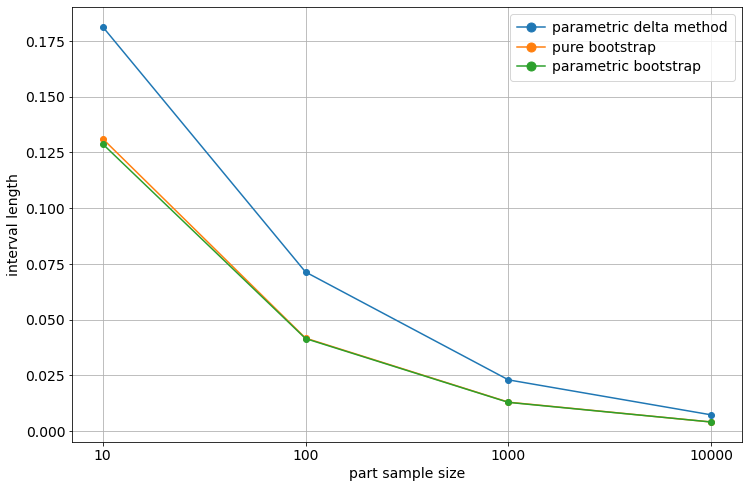

In [254]:
plt.figure(figsize=(12, 8))
plt.plot(track_parametric_ci_per_size, marker='o')
plt.plot(track_bootstrap_ci_per_size, marker='o')
plt.plot(track_parametric_bootstrap_ci_per_size, marker='o')

plt.xlabel('part sample size', fontsize=14)
plt.ylabel('interval length', fontsize=14)

plt.xticks(list(range(len(sizes))), sizes)
plt.legend(['parametric delta method', 'pure bootstrap', 'parametric bootstrap'], fontsize=14)
plt.grid()
plt.show()

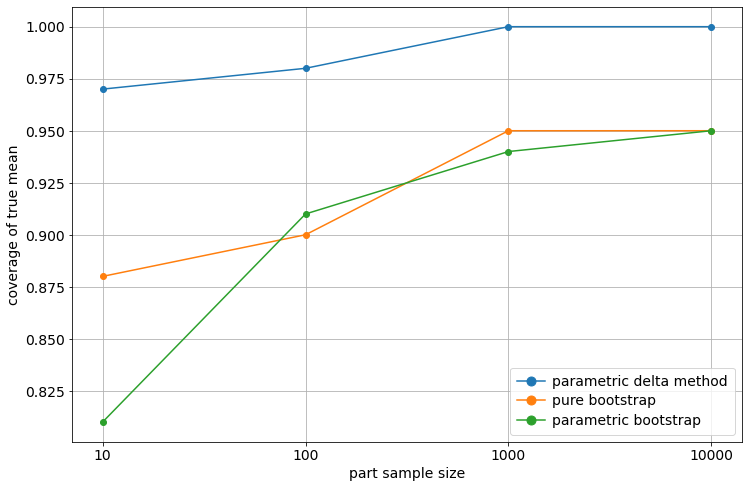

In [253]:
plt.figure(figsize=(12, 8))
plt.plot(n_parametric_ci_covers, marker='o')
plt.plot(n_bootstrap_ci_covers, marker='o')
plt.plot(n_parametric_bootstrap_ci_covers, marker='o')

plt.xlabel('part sample size', fontsize=14)
plt.ylabel('coverage of true mean', fontsize=14)

plt.xticks(list(range(len(sizes))), sizes)
plt.legend(['parametric delta method', 'pure bootstrap', 'parametric bootstrap'], fontsize=14)
plt.grid()
plt.show()

Pure and parametric bootstrap confidence intervals somehow appear to be tighter but have significantly smaller accuracy than parametric ones obtained using delta method. As previously, length of the interval is decreasing with number of samples, while coverage is (almost) increasing.